<a href="https://colab.research.google.com/github/rgoding2004/w207/blob/main/Ryan_Goding_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [59]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scipy.special import logit, expit

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.22.2.post1'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

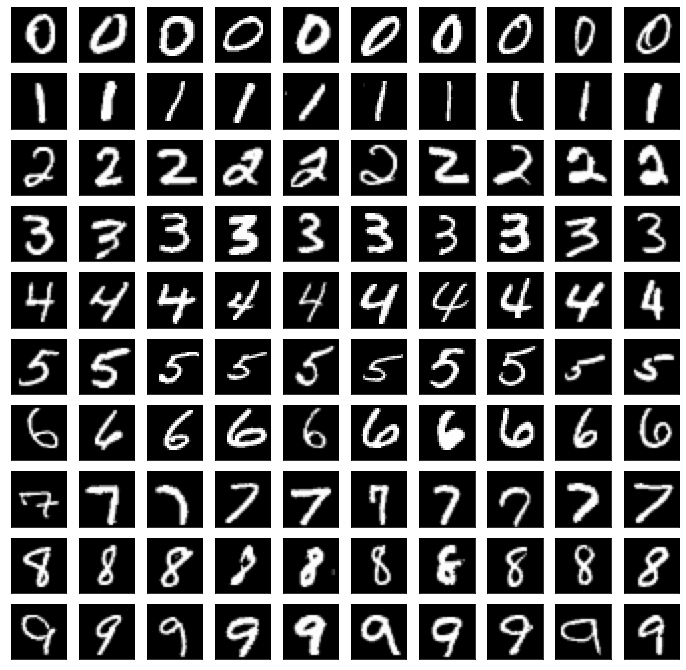

In [53]:
def Q1(num_examples=10):
  ### STUDENT START ###

  #Create list to track 10 examples of each digit
  j =0
  grid_list =[]
  #for loop to check value and add to list in order
  for p in range(11):
    for i in range(len(X)):
      #if value equal to row counter add to list
      if Y[i] == str(p) and j<10:
        grid_list.append(X[i])
        j += 1
      #once we have 10 examples reset to zero and exit for loop
      elif j==10:
        j = 0
        break

  #Create Overall Figure Size
  plt.figure(figsize = (12,12))
  #for loop to subplot each example from grid_list
  for i in range(100):
      plt.subplot(10,10,i+1)
      #each subplot should not have ticks or grid
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      #reshape 1-d array into square 2-d array
      array_reshaped = np.reshape(grid_list[i], (28,28))
      #Render grayscale array
      plt.imshow(array_reshaped, cmap ='gray',vmin =0, vmax = 1)
  plt.show()
  ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [72]:
neigh = KNeighborsClassifier(1, metric = 'euclidean')
neigh.fit(mini_train_data, mini_train_labels)
predict_list = []
predict_list = neigh.predict(dev_data)
print(classification_report(dev_labels, predict_list))



              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



In [4]:
def Q2(k_values):

### STUDENT START ###
  #Create function to evaluate accuracy of different K value nearest neighbor model
  def accuracy(predicted_list,k):
    correct, total = 0,0
    for i in range(len(predict_list)):
      if predict_list[i] == dev_labels[i]:
        correct +=1
        total +=1
      else:
        total +=1 
    #Print Accuracy Results
    print('Accuracy for k = ' + str(k) + ' nearest neighbor model:')
    print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%\n')

  for i in k_values:
    #Create K nearest neighbor model
    neigh = KNeighborsClassifier(i, metric = 'euclidean')
    #Empty list to store predictions to compare and compute accuracy 
    predict_list = []
    if i == 1:
      neigh.fit(mini_train_data, mini_train_labels)
      predict_list = neigh.predict(dev_data)
      #Print Classification Report
      print("K = 1 Nearest Neighbor Model\nPrecision, recall, and F1-score for each label:\n")
      print(classification_report(dev_labels, predict_list))
      #Run Accuracy Function
      accuracy(predict_list,i)
    else:
      neigh.fit(mini_train_data, mini_train_labels)
      predict_list = neigh.predict(dev_data)
      accuracy(predict_list,i)
      
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

K = 1 Nearest Neighbor Model
Precision, recall, and F1-score for each label:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

Accuracy for k = 1 nearest neighbor model:
total: 1000 correct: 884 accuracy: 88.40%

Accuracy for k = 3 nearest neighbor model:
total: 1000 correct: 876 accuracy:

Answer to part 4: 

Eight is the digit that is the most difficult to recognize.  This is from looking at the classification table, column recall and recognizing that eight has the lowest recall score of 0.77.

### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

Time to train model: 0.0038690567016601562 seconds
Accuracy for training size of 100 data values:
total: 1000 correct: 702 accuracy: 70.20%
Time to evaluate accuracy: 0.0005753040313720703 seconds

Time to train model: 0.007080793380737305 seconds
Accuracy for training size of 200 data values:
total: 1000 correct: 791 accuracy: 79.10%
Time to evaluate accuracy: 0.0014872550964355469 seconds

Time to train model: 0.017181396484375 seconds
Accuracy for training size of 400 data values:
total: 1000 correct: 811 accuracy: 81.10%
Time to evaluate accuracy: 0.0020494461059570312 seconds

Time to train model: 0.04468655586242676 seconds
Accuracy for training size of 800 data values:
total: 1000 correct: 866 accuracy: 86.60%
Time to evaluate accuracy: 0.0006580352783203125 seconds

Time to train model: 0.10963559150695801 seconds
Accuracy for training size of 1600 data values:
total: 1000 correct: 905 accuracy: 90.50%
Time to evaluate accuracy: 0.0006425380706787109 seconds

Time to train mode

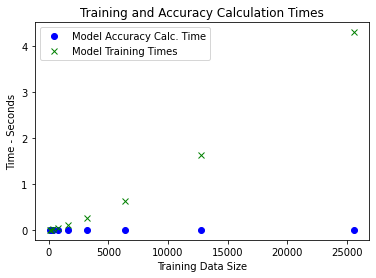

In [104]:
def Q3(train_sizes):
  
### STUDENT START ###
  def accuracy_q3(predicted_list,k):
    correct, total = 0,0
    for i in range(len(predicted_list)):
      start = time.time()
      if predicted_list[i] == dev_labels[i]:
        correct +=1
        total +=1
      else:
        total +=1 
    #Print Accuracy Results
    print('Accuracy for training size of ' + str(k) + ' data values:')
    print('total: %3d correct: %3d accuracy: %3.2f' %(total, correct, 100*correct/total)+'%')

  #Create k-nearest neighbor model with k = 1
  neigh_q3 = KNeighborsClassifier(1, metric = 'euclidean')
  
  predict_list = []
  #Empty lists to track training time and accuracy time
  train_times = []
  accuracy_time = []
  for i in range(len(train_sizes)):
    #train model and calculate/track training time
    train_time_start = time.time()
    neigh_q3.fit(train_data[:train_sizes[i]], train_labels[:train_sizes[i]])
    train_time_end = time.time()
    train_times.append(train_time_end - train_time_start)
    print('Time to train model: ' + str(train_time_end - train_time_start) + ' seconds')
    #evaluate on dev_data and track accuracy time
    predict_list = neigh_q3.predict(dev_data)
    accuracy_time_start = time.time()
    accuracy_q3(predict_list, train_sizes[i])
    accuracy_time_end = time.time()
    accuracy_time.append(accuracy_time_end - accuracy_time_start)
    print('Time to evaluate accuracy: ' + str(accuracy_time_end - accuracy_time_start) + ' seconds\n')

  #plot training time and accuracy calculation time
  plt.plot(train_sizes, accuracy_time,  'bo', label = 'Model Accuracy Calc. Time')
  plt.plot(train_sizes, train_times, 'gx', label = 'Model Training Times')
  plt.xlabel('Training Data Size')
  plt.ylabel('Time - Seconds')
  plt.legend()
  plt.title('Training and Accuracy Calculation Times')
  plt.show()
  


### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
Q3(train_sizes)

Question 3.4: Model Training times exponentially increases when the training data size is increased. Accuracy calculation time was level and consistent for all training data size.  Accuracy time staying level makes sense because the evaluation data set is 1000 and remains consistent regardless of the training data size.  I did not expect that the training time would increase exponetially from a small increase of 100 data points to 800 data items. 

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

R squared score for Linear Regression is: 0.41799714445282343

The predicted accuracy for training size of 60000 is 1.2365532582789525

The predicted accuracy for training size of 120000 is 1.6383506799820293

The predicted accuracy for training size of 1000000 is 7.531379531627158




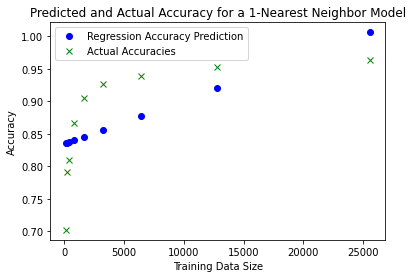

In [106]:
def Q4():

### STUDENT START ###
  larger_train_sizes_list = [60000,120000,1000000]
  larger_train_sizes = np.array([60000, 120000, 1000000])
  larger_train_sizes = larger_train_sizes.reshape(-1,1)
  #training values from question 3
  train_size_list = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
  train_sizes_array = np.array(train_size_list)
  train_sizes_array = train_sizes_array.reshape(-1,1)
  #accuracy results from question 3
  accuracies_list = [.702, .791, .810, .866, .905, .927, .939, .952, .963]
  accuracies = np.array(accuracies_list)
  accuracies = accuracies.reshape(-1,1)
  #create regression from training values and accuracy results from question 3
  reg = LinearRegression().fit(train_array_reshaped, accuracies_array_reshaped)
  #print R square score
  print('R squared score for Linear Regression is: ' + str(reg.score(train_array_reshaped, accuracies_array_reshaped)))

  #Print predicted accuracies for larger training sizes
  predict_list =[]
  for i in range(len(larger_train_sizes)):
    print("\nThe predicted accuracy for training size of " + str(larger_train_sizes_list[i]) + ' is ' + \
          str(float((reg.predict([larger_train_sizes[i]])))))
    predict_list.append(float((reg.predict([larger_train_sizes[i]]))))

  #Calculate accuracies using regression with training sizes in question 3
  predict_list_q3 = []
  for i in range(len(train_size_list)):
    predict_list_q3.append(float((reg.predict([train_sizes_array[i]]))))
  
  #Plot actual accuracies and regression accuracies
  plt.plot(train_size_list, predict_list_q3,  'bo', label = 'Regression Accuracy Prediction')
  plt.plot(train_size_list, accuracies_list, 'gx', label = 'Actual Accuracies')
  plt.xlabel('Training Data Size')
  plt.ylabel('Accuracy')
  plt.title('Predicted and Actual Accuracy for a 1-Nearest Neighbor Model')
  plt.legend()
  print('\n')
  plt.show()

    



### STUDENT END ###

Q4()

In [45]:

  
larger_train_sizes = np.array([60000, 120000, 1000000])
larger_train_sizes = larger_train_sizes.reshape(-1,1)
#training values from question 3
train_sizes = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600])
train_sizes = train_sizes.reshape(-1,1)
#accuracy results from question 3
accuracies = np.array([.702, .791, .810, .866, .905, .927, .939, .952, .963])
accuracies = accuracies.reshape(-1,1)
#create regression from training values and accuracy results from question 3
reg = LinearRegression().fit(train_array_reshaped, accuracies_array_reshaped)

In [69]:
reg.predict(np.array([[6000]]))

array([[0.87493558]])

In [90]:
print(larger_train_sizes.tolist())

[[60000], [120000], [1000000]]


Answer to part 5:  

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

Confusion Matrix:

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]

 Examples of Digits Classified as 9s but whom are actually 4s:


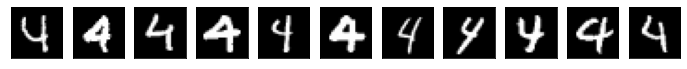

In [70]:
def Q5():

### STUDENT START ###
  #Create 1-nearest neighbor model
  neigh_q5 = KNeighborsClassifier(1, metric= 'euclidean')
  #fit to mini_training_data
  neigh_q5.fit(mini_train_data, mini_train_labels)
  #Create prediction list evaluated on dev_data
  predict = neigh_q5.predict(dev_data)
  #Display confusion Matrix
  print("Confusion Matrix:")
  print(confusion_matrix(dev_labels, predict))

  #show examples of misclassified digit
  misclass_list =[]
  #for loop to check for predicted 9s but actual 4s
  for i in range(len(predict)):
    if predict[i] == '9' and dev_labels[i] == '4':
      misclass_list.append(dev_data[i])
  #format and plot misclass list
  plt.figure(figsize = (12,12))
  plt.title("Question 5")
  #for loop to subplot each example from misclass_list
  for i in range(len(misclass_list)):
      plt.subplot(1,len(misclass_list),i+1)
      #each subplot should not have ticks or grid
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      #reshape 1-d array into square 2-d array
      array_reshaped = np.reshape(misclass_list[i], (28,28))
      #Render grayscale array
      plt.imshow(array_reshaped, cmap ='gray',vmin =0, vmax = 1)
  print('\n Examples of Digits Classified as 9s but whom are actually 4s:')
  plt.show()


### STUDENT END ###

Q5()


Answer to part 3: The model most often confuses a 4 digit for a 9 digit.  This is shown to happen in the confusion matrix 11 times, with the predicted label on the x-axis from 0-9 (left to right) and the true label on the y-axis from 9 to 0 (bottom to top).
